<a href="https://colab.research.google.com/github/borbysh/Momentum-QNG/blob/main/min_vertex_cover_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
#!pip install pennylane
#!pip install qulacs pennylane-qulacs
#!pip install seaborn
#!pip install lightning
#!pip install ipynbname

In [2]:
sessions = [
    {"optimizer" : "QNGOptimizer",
     "params" : {"approx" : 'block-diag', "lam" : 0.5},
     "params_name" : "approx='block-diag', $\mathit{"+ chr(955) + "}$=0.5",
     "stepsizes" : [0.01,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25],
     "dev" : "default.qubit"},
    {"optimizer" :  "AdamOptimizer",
     "params" : {"beta1" : 0.9, "beta2" : 0.99, "epsilon" : 1.0e-8},
     "params_name" : "$\mathit{"+ chr(946) + "}_1$=0.9, $\mathit{"+ chr(946) + "}_2$=0.99, $\mathit{"+ chr(949) +"}$=$10^{-8}$",
     "stepsizes" : [0.01,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25],
     "dev" : "default.qubit"},
    {"optimizer" :  "MomentumOptimizer",
     "params" : {"momentum" : 0.9},
     "params_name" : "$\mathit{"+ chr(961) +"}$=0.9",
     "stepsizes" : [0.001,0.003,0.005,0.007,0.009,0.011,0.013,0.015,0.017,0.019,0.021],
     "dev" : "default.qubit"},
    {"optimizer" :  "MomentumQNGOptimizer",
     "params" : {"momentum" : 0.9, "approx" : 'block-diag', "lam" : 0.5},
     "params_name" : "$\mathit{"+ chr(961) +"}$=0.9, approx='block-diag', $\mathit{"+ chr(955) + "}$=0.5",
     "stepsizes" : [0.01,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25],
     "dev" : "default.qubit"}
]

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
C:\Users\mbrat\AppData\Local\Temp\ipykernel_95160\1496546850.py:4: SyntaxWarning: invalid escape sequence '\m'
  "params_name" : "approx='block-diag', $\mathit{"+ chr(955) + "}$=0.5",
C:\Users\mbrat\AppData\Local\Temp\ipykernel_95160\1496546850.py:9: SyntaxWarning: invalid escape sequence '\m'

In [3]:
init_count = 200
steps = 200

cost_tolerance = 0.01
cost_tolerance_count = 3



In [4]:
session_paths = [
    ["qng",["/1","/2","/3","/4","/5","/6","/7","/8"]],
    ["adam",[""]],
    ["mom",["/1"]],
    ["momqng",["/1","/2","/3","/4","/5","/6","/7","/8"]]
]

In [5]:
arr = [ [0]*2 for i in range(3)]
print(arr)
arr[0][0] = 1
print(arr)

[[0, 0], [0, 0], [0, 0]]
[[1, 0], [0, 0], [0, 0]]


In [6]:
import glob

def read_data(session_path):
    
    stepsizes = []
    session_name = session_path[0]
    for path in session_path[1]:
        pattern = "../"+session_name+path+ "/mvc8_low_"+session_name+"_stepsizes_*.dat"
        print(pattern)
        filenames = glob.glob(pattern)
        with open(filenames[-1], "r") as file:
            vals = file.readlines()[0].split()
            for i in range(1,len(vals)):
                stepsizes += [float(vals[i])]

    total_stepsize_count = len(stepsizes)
    print(total_stepsize_count,stepsizes)
    quality = [ [0.0]*init_count for i in range(total_stepsize_count)]
    steps = [ [0.0]*init_count for i in range(total_stepsize_count)]
    start_stepsize_index = 0
    for path in session_path[1]:
        pattern = "../"+session_name+path+ "/mvc8_low_"+session_name+"_stepsizes_*.dat"
        filenames = glob.glob(pattern)
        stepsizes_count = 0
        with open(filenames[-1], "r") as file:
            stepsizes_count = len(file.readlines()[0].split())-1      
        
        pattern = "../"+session_name+path+ "/mvc8_low_"+session_name+"_quality_*.dat"
        filenames = glob.glob(pattern)
        with open(filenames[-1], "r") as file:
            lines = file.readlines()
            for iline,line in enumerate(lines):
                vals = line.split()
                for i in range(stepsizes_count):
                    quality[start_stepsize_index + i][iline] = float(vals[i+1])
        pattern = "../"+session_name+path+ "/mvc8_low_"+session_name+"_steps_*.dat"
        filenames = glob.glob(pattern)
        with open(filenames[-1], "r") as file:
            lines = file.readlines()
            for iline,line in enumerate(lines):
                vals = line.split()
                for i in range(stepsizes_count):
                    steps[start_stepsize_index + i][iline] = float(vals[i+1])
        start_stepsize_index += stepsizes_count
        
            
    
    return stepsizes, quality, steps
    

In [7]:
stepsizes, cur_quality, cur_steps = read_data(session_paths[1])

../adam/mvc8_low_adam_stepsizes_*.dat
20 [0.01, 0.025, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.3, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.6500000000000001, 0.7000000000000001, 0.7500000000000001, 0.8, 0.8500000000000001, 0.9000000000000001]


In [8]:
sessions_steps = []
sessions_quality = []

qng_stepsizes, qng_quality, qng_steps = read_data(session_paths[0])
sessions_quality.append(qng_quality)
sessions_steps.append(qng_steps)
sessions[0]["stepsizes"] = qng_stepsizes

adam_stepsizes, adam_quality, adam_steps = read_data(session_paths[1])
sessions_quality.append(adam_quality)
sessions_steps.append(adam_steps)
sessions[1]["stepsizes"] = adam_stepsizes

mom_stepsizes, mom_quality, mom_steps = read_data(session_paths[2])
sessions_quality.append(mom_quality)
sessions_steps.append(mom_steps)
sessions[2]["stepsizes"] = mom_stepsizes

momqng_stepsizes, momqng_quality, momqng_steps = read_data(session_paths[3])
sessions_quality.append(momqng_quality)
sessions_steps.append(momqng_steps)
sessions[3]["stepsizes"] = momqng_stepsizes
max_stepsizes = max([len(session["stepsizes"]) for session in sessions])
print(max_stepsizes)

../qng/1/mvc8_low_qng_stepsizes_*.dat
../qng/2/mvc8_low_qng_stepsizes_*.dat
../qng/3/mvc8_low_qng_stepsizes_*.dat
../qng/4/mvc8_low_qng_stepsizes_*.dat
../qng/5/mvc8_low_qng_stepsizes_*.dat
../qng/6/mvc8_low_qng_stepsizes_*.dat
../qng/7/mvc8_low_qng_stepsizes_*.dat
../qng/8/mvc8_low_qng_stepsizes_*.dat
16 [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.4, 0.5, 0.6]
../adam/mvc8_low_adam_stepsizes_*.dat
20 [0.01, 0.025, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.3, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.6500000000000001, 0.7000000000000001, 0.7500000000000001, 0.8, 0.8500000000000001, 0.9000000000000001]
../mom/1/mvc8_low_mom_stepsizes_*.dat
21 [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.010000000000000002, 0.011, 0.012, 0.013000000000000001, 0.014000000000000002, 0.015, 0.016, 0.017, 0.018000000000000002, 0.019000000000000003, 0.02, 0.021]
../momqng/1/mvc8_low_momqng_stepsizes_*.dat
../

<>:22: SyntaxWarning: invalid escape sequence '\e'
<>:22: SyntaxWarning: invalid escape sequence '\e'
C:\Users\mbrat\AppData\Local\Temp\ipykernel_95160\2181110214.py:22: SyntaxWarning: invalid escape sequence '\e'
  axs.ecdf(sessions_quality[i][j],complementary=True, color=colors[j], label=f"$\eta$={stepsize:.4}" )


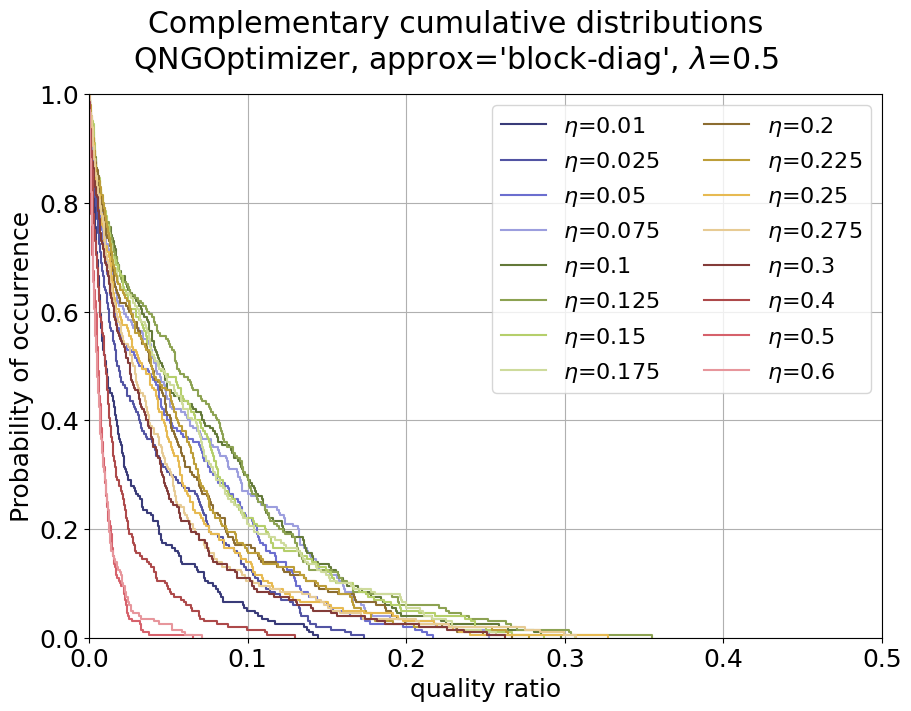

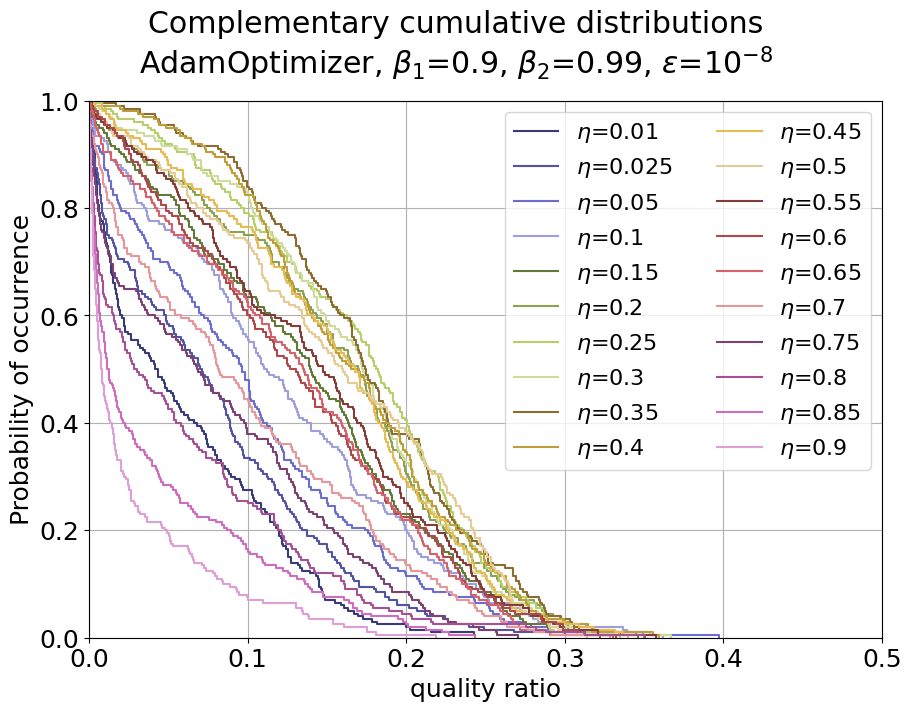

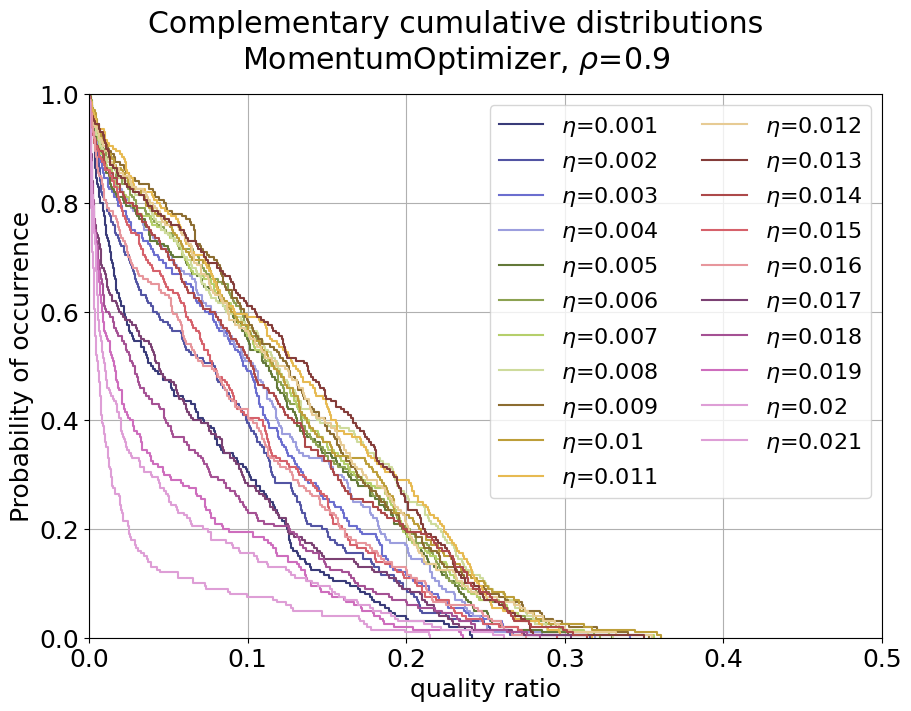

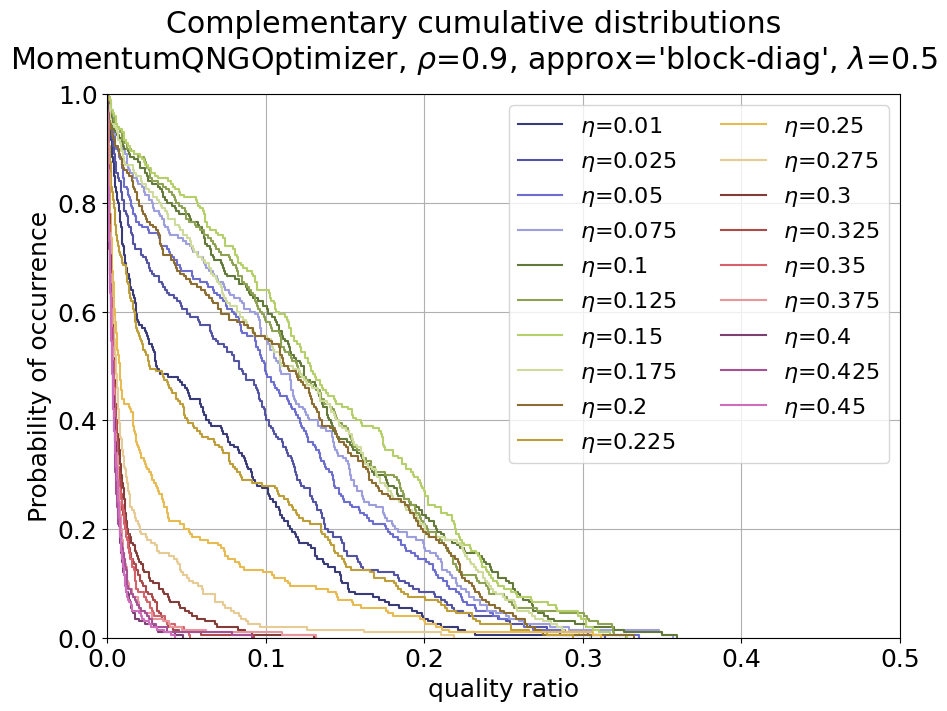

In [9]:
import matplotlib as mpl
from datetime import date
import ipynbname
import numpy as np
from matplotlib import pyplot as plt

mpl.rcParams['font.size'] = 18

prefix_name = ipynbname.name() + "_" #+ str(date.today()) + "_"
prefix_name = "mvc_8_"
cmap = mpl.colormaps['tab20b']
colors = cmap(np.linspace(0, 1, max_stepsizes))

for i,session in enumerate(sessions):
    fig = plt.figure(figsize=(9, 7), layout="compressed")
    axs = fig.subplots(1, 1, sharex=True, sharey=True)

    # Cumulative distributions.

    for j,stepsize in enumerate(session["stepsizes"]):
        #print(i,j,stepsize)
        axs.ecdf(sessions_quality[i][j],complementary=True, color=colors[j], label=f"$\eta$={stepsize:.4}" )

    # Label the figure.
    title = "Complementary cumulative distributions\n" + session["optimizer"]
    if(len(session["params_name"]) > 0):
        title += ", " + session["params_name"]

    fig.suptitle(title)

    axs.grid(True)
    axs.legend(fontsize=16,ncol=2)
    axs.set_xlabel("quality ratio")
    axs.set_ylabel("Probability of occurrence")
    axs.label_outer()
    axs.set_xlim(0.0, 0.5)
    plt.show()
    #fig.savefig(prefix_name + session["optimizer"]+"_ccdf_quality.png",format='png',dpi=300)
    #fig.savefig(prefix_name + session["optimizer"]+"_ccdf_quality.pdf",format='pdf',dpi=300)
    #fig.savefig(prefix_name + session["optimizer"]+"_ccdf_quality.eps",format='eps',dpi=300)

<>:13: SyntaxWarning: invalid escape sequence '\e'
<>:13: SyntaxWarning: invalid escape sequence '\e'
C:\Users\mbrat\AppData\Local\Temp\ipykernel_95160\1662478400.py:13: SyntaxWarning: invalid escape sequence '\e'
  axs.ecdf(sessions_steps[i][j],complementary=True, color=colors[j], label=f"$\eta$={stepsize:.4}" )


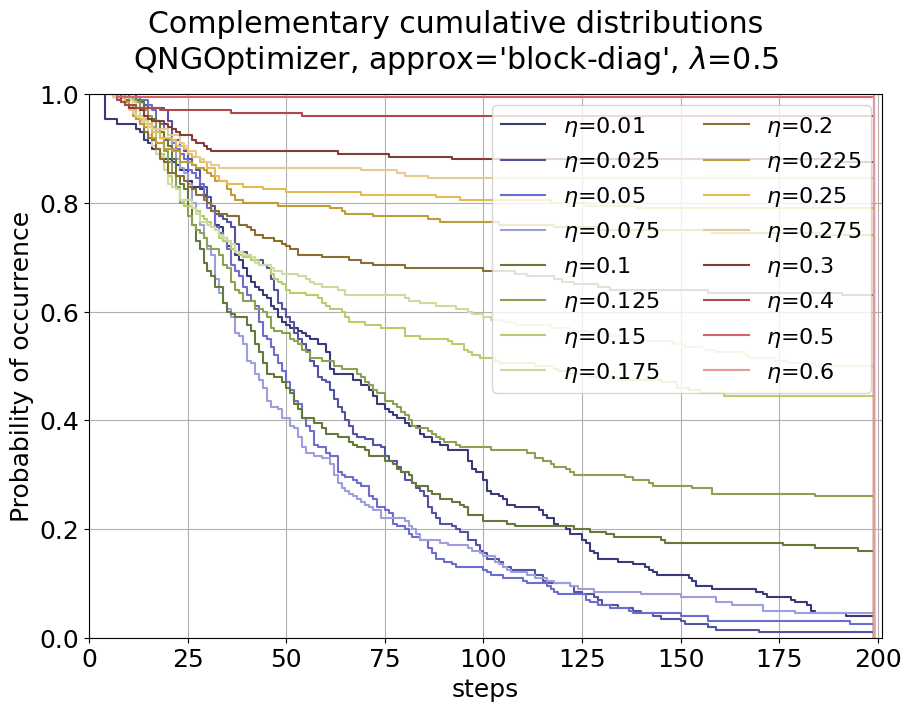

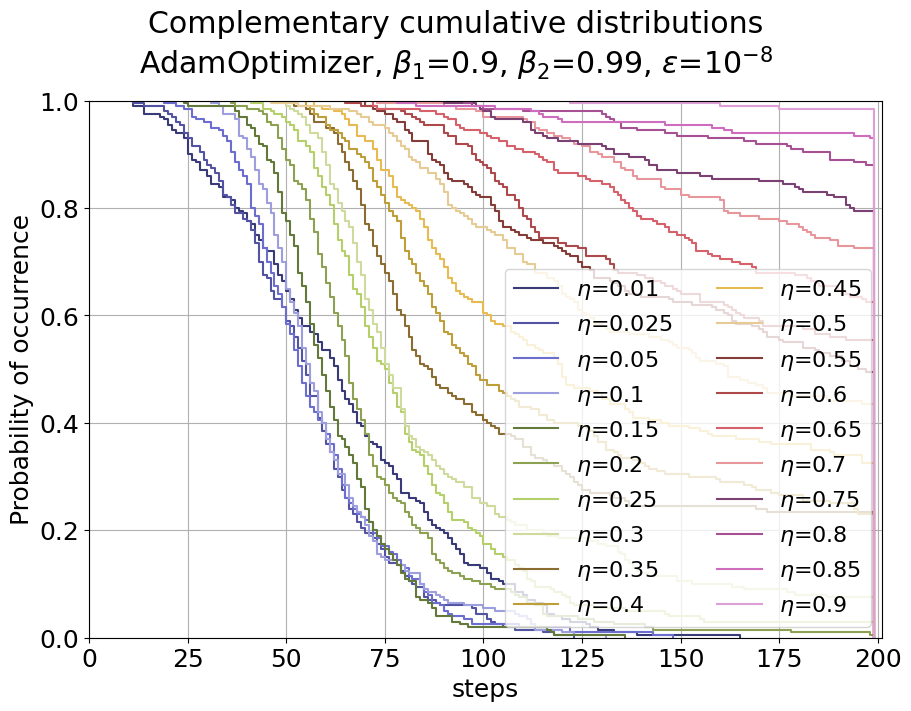

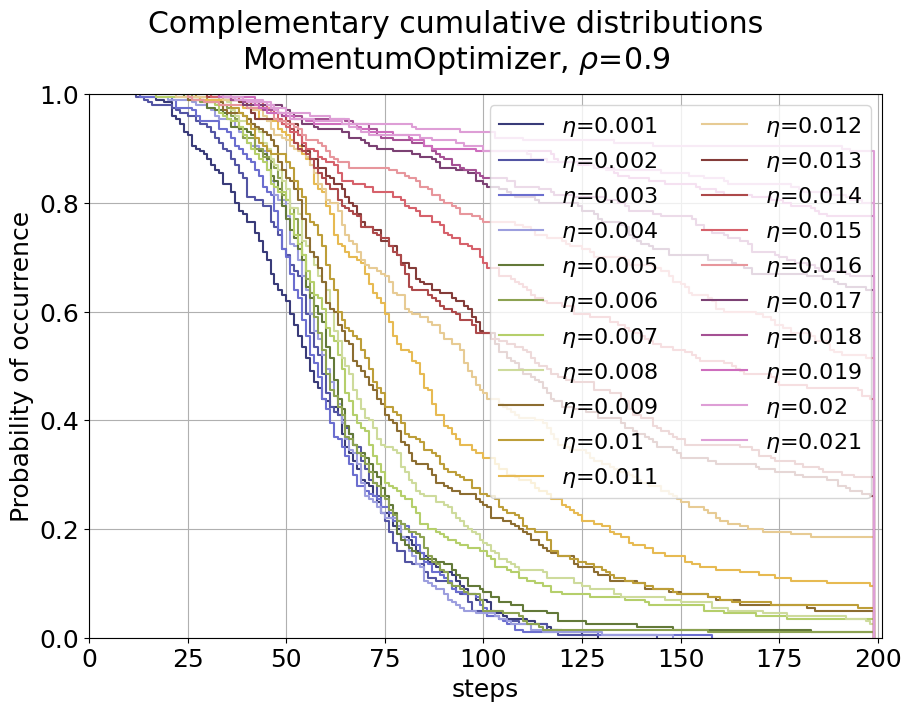

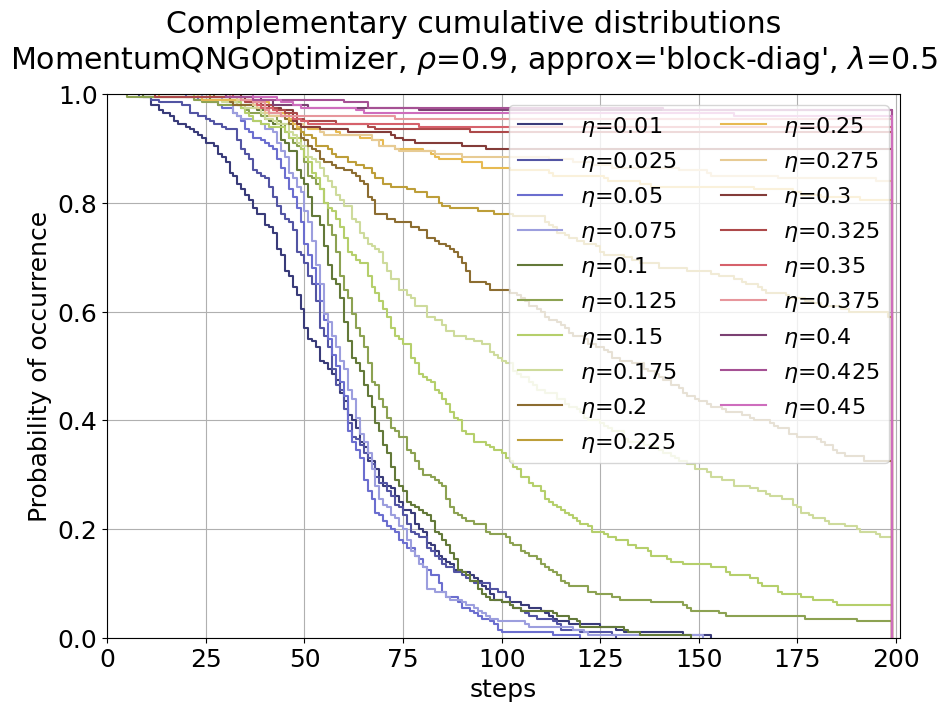

In [10]:
import matplotlib as mpl

cmap = mpl.colormaps['tab20b']
colors = cmap(np.linspace(0, 1, max_stepsizes))

for i,session in enumerate(sessions):
    fig = plt.figure(figsize=(9, 7), layout="compressed")
    axs = fig.subplots(1, 1, sharex=True, sharey=True)

    # Cumulative distributions.

    for j,stepsize in enumerate(session["stepsizes"]):
        axs.ecdf(sessions_steps[i][j],complementary=True, color=colors[j], label=f"$\eta$={stepsize:.4}" )

    # Label the figure.
    title = "Complementary cumulative distributions\n" + session["optimizer"]
    if(len(session["params_name"]) > 0):
        title += ", " + session["params_name"]

    fig.suptitle(title)

    axs.grid(True)
    axs.legend(fontsize=16,ncol=2)
    axs.set_xlabel("steps")
    axs.set_ylabel("Probability of occurrence")
    axs.label_outer()
    axs.set_xlim(0.0, 201)
    plt.show()
    #fig.savefig(prefix_name + session["optimizer"]+"_ccdf_steps.png",format='png',dpi=300)
    #fig.savefig(prefix_name + session["optimizer"]+"_ccdf_steps.pdf",format='pdf',dpi=300)
    #fig.savefig(prefix_name + session["optimizer"]+"_ccdf_steps.eps",format='eps',dpi=300)

<>:13: SyntaxWarning: invalid escape sequence '\e'
<>:15: SyntaxWarning: invalid escape sequence '\e'
<>:17: SyntaxWarning: invalid escape sequence '\e'
<>:19: SyntaxWarning: invalid escape sequence '\e'
<>:13: SyntaxWarning: invalid escape sequence '\e'
<>:15: SyntaxWarning: invalid escape sequence '\e'
<>:17: SyntaxWarning: invalid escape sequence '\e'
<>:19: SyntaxWarning: invalid escape sequence '\e'
C:\Users\mbrat\AppData\Local\Temp\ipykernel_95160\3318663592.py:13: SyntaxWarning: invalid escape sequence '\e'
  axs[0][0].ecdf(sessions_quality[0][j],complementary=True, color=colors[j], label=f"$\eta$={stepsize:.4}")
C:\Users\mbrat\AppData\Local\Temp\ipykernel_95160\3318663592.py:15: SyntaxWarning: invalid escape sequence '\e'
  axs[0][1].ecdf(sessions_quality[1][j],complementary=True, color=colors[j], label=f"$\eta$={stepsize:.4}")
C:\Users\mbrat\AppData\Local\Temp\ipykernel_95160\3318663592.py:17: SyntaxWarning: invalid escape sequence '\e'
  axs[1][1].ecdf(sessions_quality[2][j],

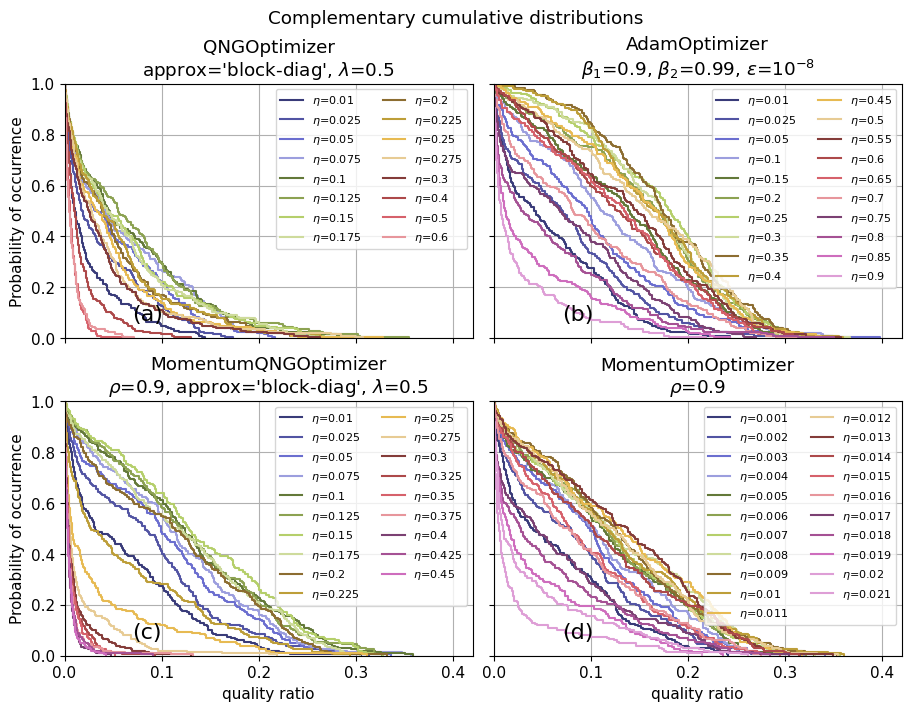

In [11]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 11

fig = plt.figure(figsize=(9, 7), layout="compressed")
axs = fig.subplots(2, 2, sharex=True, sharey=True)

# Cumulative distributions.
cmap = mpl.colormaps['tab20b']
colors = cmap(np.linspace(0, 1, max_stepsizes))

for j,stepsize in enumerate(sessions[0]["stepsizes"]):
    #print(j,stepsize)
    axs[0][0].ecdf(sessions_quality[0][j],complementary=True, color=colors[j], label=f"$\eta$={stepsize:.4}")
for j,stepsize in enumerate(sessions[1]["stepsizes"]):
    axs[0][1].ecdf(sessions_quality[1][j],complementary=True, color=colors[j], label=f"$\eta$={stepsize:.4}")
for j,stepsize in enumerate(sessions[2]["stepsizes"]):
    axs[1][1].ecdf(sessions_quality[2][j],complementary=True, color=colors[j], label=f"$\eta$={stepsize:.4}")
for j,stepsize in enumerate(sessions[3]["stepsizes"]):
    axs[1][0].ecdf(sessions_quality[3][j],complementary=True, color=colors[j], label=f"$\eta$={stepsize:.4}")

session_id = [0,1,3,2]
axs[0][0].text(0.07,0.07,"(a)",fontsize=16)
axs[0][1].text(0.07,0.07,"(b)",fontsize=16)
axs[1][0].text(0.07,0.07,"(c)",fontsize=16)
axs[1][1].text(0.07,0.07,"(d)",fontsize=16)
fig.suptitle("Complementary cumulative distributions")
for i in range(2):
    for j in range(2):
        axs[j][i].grid(True)
        axs[j][i].set_xlabel("quality ratio")
        axs[j][i].set_ylabel("Probability of occurrence")
        axs[j][i].label_outer()
        axs[j][i].set_xlim(0.0, 0.42)
        axs[j][i].legend(loc="upper right",fontsize=8,ncol=2)
        session = sessions[session_id[i*2+j]]
        title = session["optimizer"]
        if(len(session["params_name"]) > 0):
            title += "\n" + session["params_name"]
        axs[i][j].set_title(title)

plt.show()
#fig.savefig(prefix_name + "quality_ccdf.png",format='png',dpi=300)
fig.savefig(prefix_name + "quality_ccdf.pdf",format='pdf',dpi=300)
#fig.savefig(prefix_name + "quality_ccdf.eps",format='eps',dpi=300)

<>:13: SyntaxWarning: invalid escape sequence '\e'
<>:15: SyntaxWarning: invalid escape sequence '\e'
<>:17: SyntaxWarning: invalid escape sequence '\e'
<>:19: SyntaxWarning: invalid escape sequence '\e'
<>:13: SyntaxWarning: invalid escape sequence '\e'
<>:15: SyntaxWarning: invalid escape sequence '\e'
<>:17: SyntaxWarning: invalid escape sequence '\e'
<>:19: SyntaxWarning: invalid escape sequence '\e'
C:\Users\mbrat\AppData\Local\Temp\ipykernel_95160\1231821783.py:13: SyntaxWarning: invalid escape sequence '\e'
  axs[0][0].ecdf(sessions_steps[0][j],complementary=True, color=colors[j], label=f"$\eta$={stepsize:.4}" )
C:\Users\mbrat\AppData\Local\Temp\ipykernel_95160\1231821783.py:15: SyntaxWarning: invalid escape sequence '\e'
  axs[0][1].ecdf(sessions_steps[1][j],complementary=True, color=colors[j], label=f"$\eta$={stepsize:.4}" )
C:\Users\mbrat\AppData\Local\Temp\ipykernel_95160\1231821783.py:17: SyntaxWarning: invalid escape sequence '\e'
  axs[1][1].ecdf(sessions_steps[2][j],comp

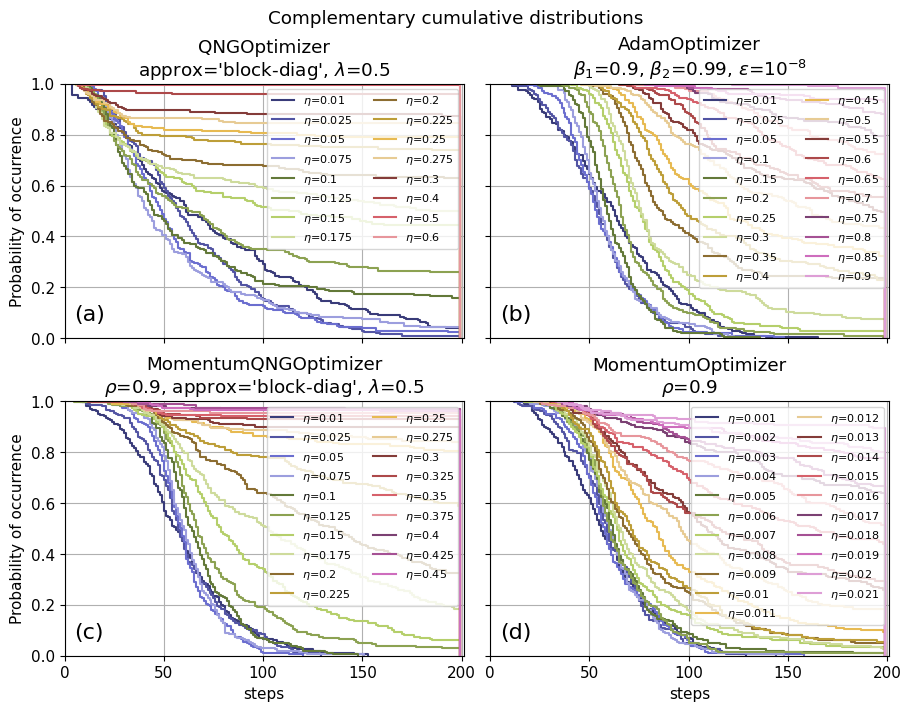

In [12]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 11

fig = plt.figure(figsize=(9, 7), layout="compressed")
axs = fig.subplots(2, 2, sharex=True, sharey=True)

# Cumulative distributions.
cmap = mpl.colormaps['tab20b']
colors = cmap(np.linspace(0, 1, max_stepsizes))

for j,stepsize in enumerate(sessions[0]["stepsizes"]):
    #print(j)
    axs[0][0].ecdf(sessions_steps[0][j],complementary=True, color=colors[j], label=f"$\eta$={stepsize:.4}" )
for j,stepsize in enumerate(sessions[1]["stepsizes"]):
    axs[0][1].ecdf(sessions_steps[1][j],complementary=True, color=colors[j], label=f"$\eta$={stepsize:.4}" )
for j,stepsize in enumerate(sessions[2]["stepsizes"]):
    axs[1][1].ecdf(sessions_steps[2][j],complementary=True, color=colors[j], label=f"$\eta$={stepsize:.4}" )
for j,stepsize in enumerate(sessions[3]["stepsizes"]):
    axs[1][0].ecdf(sessions_steps[3][j],complementary=True, color=colors[j], label=f"$\eta$={stepsize:.4}" )

session_id = [0,1,3,2]

axs[0][0].text(5,0.07,"(a)",fontsize=16)
axs[0][1].text(5,0.07,"(b)",fontsize=16)
axs[1][0].text(5,0.07,"(c)",fontsize=16)
axs[1][1].text(5,0.07,"(d)",fontsize=16)
fig.suptitle("Complementary cumulative distributions")
for i in range(2):
    for j in range(2):
        axs[j][i].grid(True)
        axs[j][i].set_xlabel("steps")
        axs[j][i].set_ylabel("Probability of occurrence")
        axs[j][i].label_outer()
        axs[j][i].set_xlim(0.0, 201)
        axs[j][i].legend(loc="upper right",fontsize=8,ncol=2)
        session = sessions[session_id[i*2+j]]
        title = session["optimizer"]
        if(len(session["params_name"]) > 0):
            title += "\n" + session["params_name"]
        axs[i][j].set_title(title)

plt.show()
#fig.savefig(prefix_name + "steps_ccdf.png",format='png',dpi=300)
fig.savefig(prefix_name + "steps_ccdf.pdf",format='pdf',dpi=300)
#fig.savefig(prefix_name + "steps_ccdf.eps",format='eps',dpi=300)

In [13]:
#!pip install torch

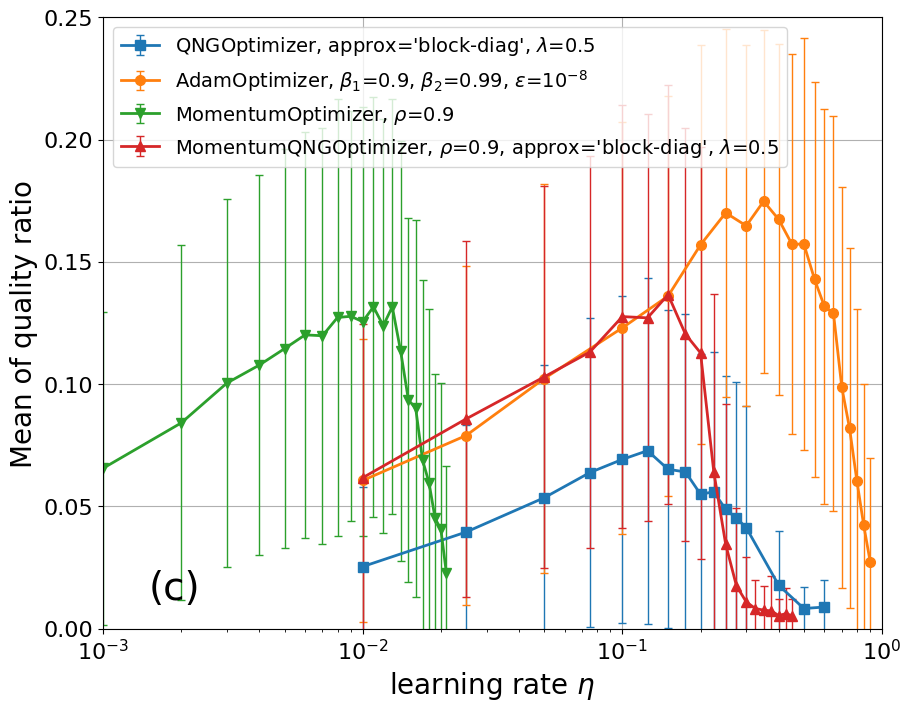

In [14]:
import matplotlib as mpl
import statistics
import math
import torch

mpl.rcParams['font.size'] = 16

cmap = mpl.colormaps['tab20b']
colors = cmap(np.linspace(0, 1, max_stepsizes))
fig = plt.figure(figsize=(9, 7), layout="compressed")
axs = fig.subplots(1, 1, sharex=True, sharey=True)
axs.text(0.0015,0.012,"(c)",fontsize=28)
format_plot = ["s-","o-","v-","^-"]
for i,session in enumerate(sessions):
    ave_session = []
    stdev_session = []
    for j,stepsize in enumerate(session["stepsizes"]):
        quality = []
        for k in range(init_count):
            quality.append(float(sessions_quality[i][j][k]))
        ave_val = statistics.mean(quality)
        stdev_val = statistics.stdev(quality)
        ave_session.append(ave_val)
        if(stdev_val == 'NaN'):
            stdev_val = 0
        stdev_session.append(stdev_val)
    label = session["optimizer"]
    if(len(session["params_name"]) > 0):
        label += ", " + session["params_name"]
    axs.errorbar(session["stepsizes"],ave_session,yerr=stdev_session,elinewidth=1,label=label,capsize=3,fmt=format_plot[i],ms=7,lw=2)

    axs.grid(True)
    axs.legend(fontsize=14)
    axs.set_xlabel(r'learning rate $\eta$',fontsize=20)
    axs.set_ylabel("Mean of quality ratio",fontsize=20)
    #axs.label_outer()
    axs.set_xlim(0.001, 1)
    axs.set_xscale('log')
    axs.set_ylim(0.0, 0.25)
plt.show()
fig.savefig(prefix_name+"ave_quality.png",format='png',dpi=300)
fig.savefig(prefix_name+"ave_quality.pdf",format='pdf',dpi=300)
#fig.savefig(prefix_name+"_ave_quality.eps",format='eps',dpi=300)

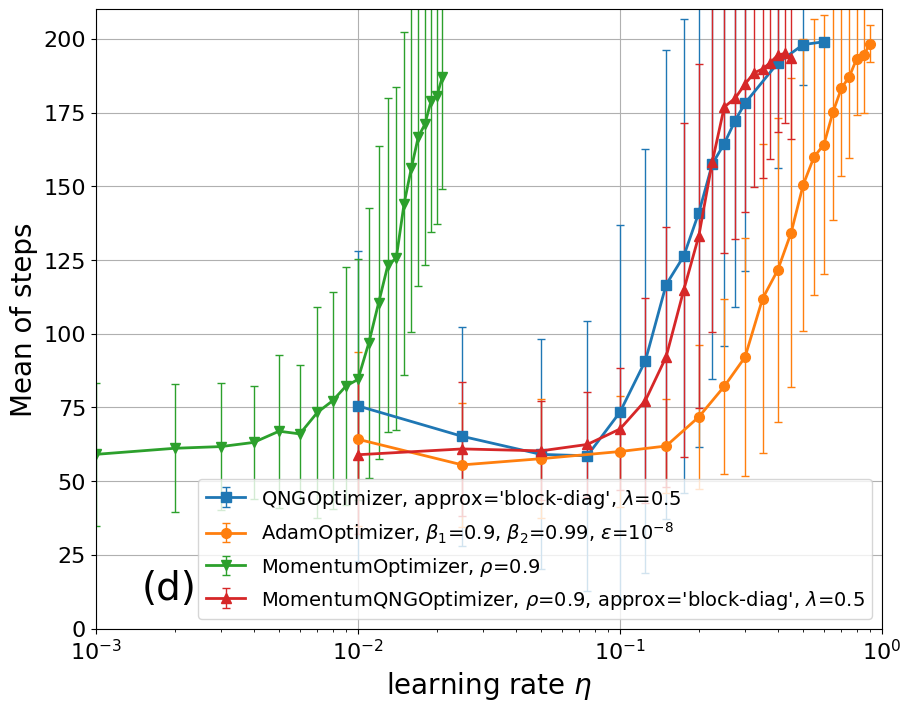

In [15]:
import matplotlib as mpl
import statistics
import math
import torch

cmap = mpl.colormaps['tab20b']
colors = cmap(np.linspace(0, 1, 20))
fig = plt.figure(figsize=(9, 7), layout="compressed")
axs = fig.subplots(1, 1, sharex=True, sharey=True)
axs.text(0.0015,10.0,"(d)",fontsize=28)
format_plot = ["s-","o-","v-","^-"]
for i,session in enumerate(sessions):
    ave_session = []
    stdev_session = []
    for j,stepsize in enumerate(session["stepsizes"]):
        arr_steps = []
        for k in range(init_count):
            arr_steps.append(float(sessions_steps[i][j][k]))
        ave_val = statistics.mean(arr_steps)
        stdev_val = statistics.stdev(arr_steps)
        ave_session.append(ave_val)
        if(stdev_val == 'NaN'):
            stdev_val = 0
        stdev_session.append(stdev_val)
    label = session["optimizer"]
    if(len(session["params_name"]) > 0):
        label += ", " + session["params_name"]
    axs.errorbar(session["stepsizes"],ave_session,yerr=stdev_session,elinewidth=1,label=label,capsize=3,fmt=format_plot[i],ms=7,lw=2)

    axs.grid(True)
    axs.legend(fontsize=14)
    axs.set_xlabel(r'learning rate $\eta$',fontsize=20)
    axs.set_ylabel("Mean of steps",fontsize=20)
    #axs.label_outer()
    axs.set_xlim(0.001, 1)
    axs.set_xscale('log')
    axs.set_ylim(0.0, 210)
plt.show()
fig.savefig(prefix_name+"ave_steps.png",format='png',dpi=300)
fig.savefig(prefix_name+"ave_steps.pdf",format='pdf',dpi=300)
#fig.savefig(prefix_name+"_ave_steps.eps",format='eps',dpi=300)